#### Imports/Setup

In [3]:
# Import sklearn/tensorflow modules.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score

# Import other modules.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Ellipse
import statsmodels.formula.api as smf
import pickle
import math
import os
from time import sleep
from sportsipy.mlb.teams import Teams
from IPython.display import clear_output
get_ipython().run_line_magic('matplotlib', 'inline')

dataset = pd.read_csv('./data/data.csv')

pitch_color_key = {
    'Changeup': 'blue',
    'Curveball': 'lime',
    'Cutter': 'indigo',
    'Four-Seam': 'red',
    'Other': 'gray',
    'Sinker': 'darkorange',
    'Slider': 'magenta',
    'Splitter': 'cyan'
}


### Get Data

#### Data Exploration

In [2]:
# Trying to find max and min of the height and width of pitches on the zone...

vert_values = list(dataset['PlateLocHeight'])
horiz_values = list(dataset['PlateLocSide'])

print(f'Vert Loc: max: {max(vert_values)} min: {min(vert_values)}')
print(f'Horiz Loc: max: {max(horiz_values)} min: {min(horiz_values)}')


Vert Loc: max: 5.02142 min: -0.96669
Horiz Loc: max: 3.95792 min: -3.55291


### Release Point Graphs

#### Release Point Data

In [3]:
release_pt_dataset = dataset[['Pitcher', 'AutoPitchType', 'RelHeight', 'RelSide']]
display(release_pt_dataset)


,Pitcher,AutoPitchType,RelHeight,RelSide
0,"Frohn, Jake",Changeup,5.93642,1.39480
1,"Frohn, Jake",Slider,5.90074,1.42815
2,"Frohn, Jake",Slider,5.94128,1.49953
3,"Frohn, Jake",Four-Seam,6.01319,1.42626
4,"Frohn, Jake",Four-Seam,5.93945,1.41119
...,...,...,...,...
257,"Player 10, Extra",Changeup,4.58499,2.73205
258,"Player 10, Extra",Changeup,4.70356,2.87093
259,"Player 10, Extra",Changeup,4.98488,2.58888
260,"Player 10, Extra",Changeup,4.92257,2.58840


#### Create Visualization Function

In [4]:
def release_pt_graph(name):
    selected_data = release_pt_dataset[release_pt_dataset['Pitcher'] == name]
    unique_pitches = np.unique(selected_data['AutoPitchType'])
    unique_colors = [pitch_color_key[unique_pitch] for unique_pitch in unique_pitches]
    colors_subset = []

    for pitch_type in selected_data['AutoPitchType']:
        colors_subset.append(pitch_color_key[pitch_type])

    fig, ax = plt.subplots()

    scatter = ax.scatter(selected_data['RelSide'], selected_data['RelHeight'], c=colors_subset)
    ax.set(xlim=(-3, 3), ylim=(4.5, 6))
    ax.set_xlabel('Release Point X (in.)')
    ax.set_ylabel('Release Point Y (in.)')
    ax.legend(*scatter.legend_elements())
    ax.spines[['right', 'top']].set_visible(False)
    ax.grid(color='white')
    ax.set_facecolor('#ebebeb')

    last_name, first_name = name.split(', ')
    ax.set_title(f'{first_name} {last_name} Release Point')

    starting_height = 5.9

    for color, pitch in zip(unique_colors, unique_pitches):
        ax.add_patch(Ellipse((-2.5, starting_height+.015), .13, .05, color=color))
        ax.text(-2.25, starting_height, f'{pitch}')
        starting_height -= .1

# input('Choose pitcher > ')


c:\Users\rohan\anaconda3\lib\site-packages\matplotlib\collections.py:1080: UserWarning: Collection without array used. Make sure to specify the values to be colormapped via the `c` argument.
  warnings.warn("Collection without array used. Make sure to "


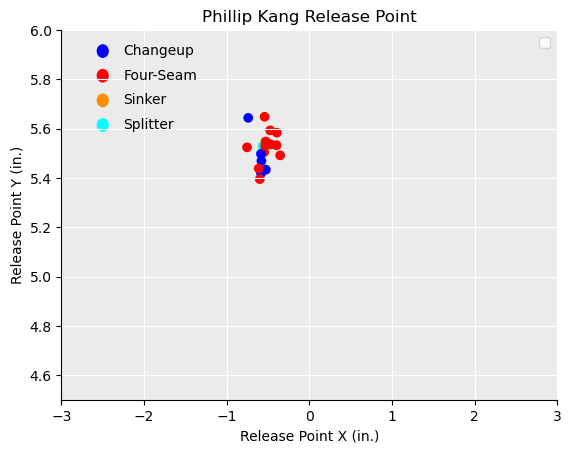

In [5]:
release_pt_graph('Kang, Phillip')

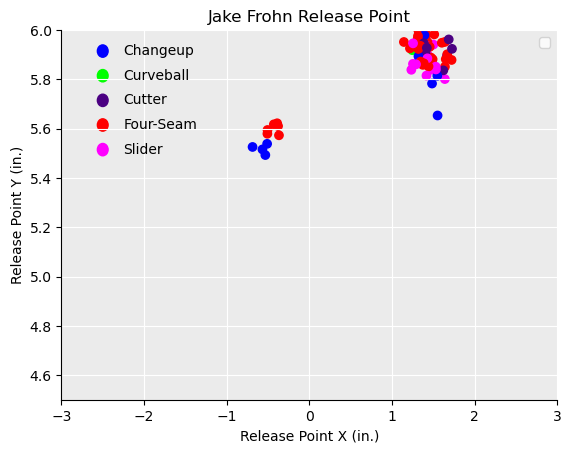

In [6]:
release_pt_graph('Frohn, Jake')

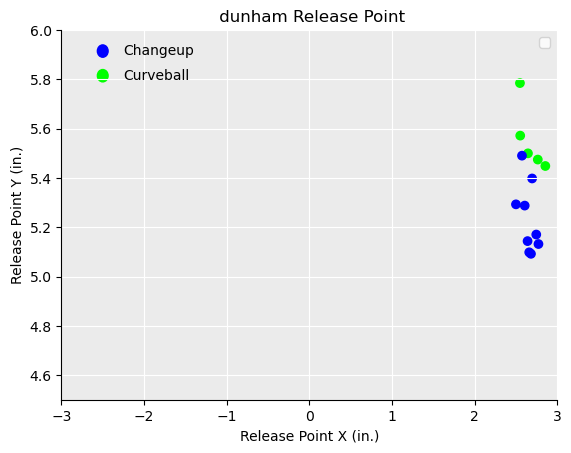

In [7]:
release_pt_graph('dunham, ')

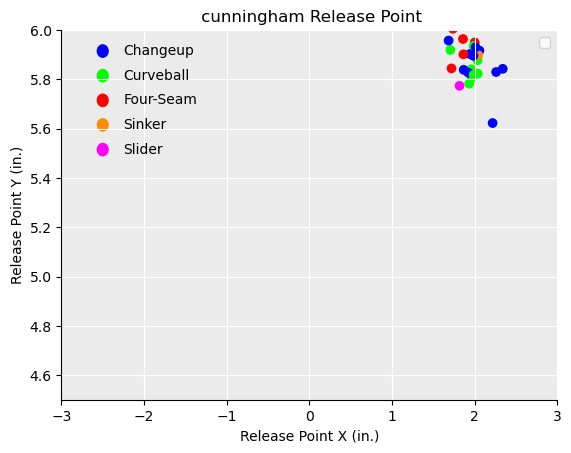

In [8]:
release_pt_graph('cunningham, ')

### Pitch Break Graphs

#### Pitch Break Data

In [4]:
pitch_break_dataset = dataset[['Pitcher', 'AutoPitchType', 'InducedVertBreak', 'HorzBreak']]
display(pitch_break_dataset)


,Pitcher,AutoPitchType,InducedVertBreak,HorzBreak
0,"Frohn, Jake",Changeup,19.15040,9.04729
1,"Frohn, Jake",Slider,4.99481,-2.73059
2,"Frohn, Jake",Slider,5.52134,-3.30953
3,"Frohn, Jake",Four-Seam,19.45344,13.30764
4,"Frohn, Jake",Four-Seam,20.32761,8.53642
...,...,...,...,...
257,"Player 10, Extra",Changeup,10.77768,18.76871
258,"Player 10, Extra",Changeup,7.05457,20.24694
259,"Player 10, Extra",Changeup,14.60249,20.64292
260,"Player 10, Extra",Changeup,12.31056,20.41505


#### Create Visualization Function

In [5]:
def pitch_break_graph(name):
    selected_data = pitch_break_dataset[pitch_break_dataset['Pitcher'] == name]
    unique_pitches = np.unique(selected_data['AutoPitchType'])
    unique_colors = [pitch_color_key[unique_pitch] for unique_pitch in unique_pitches]
    colors_subset = []

    for pitch_type in selected_data['AutoPitchType']:
        colors_subset.append(pitch_color_key[pitch_type])
    
    fig, ax = plt.subplots()

    scatter = ax.scatter(selected_data['HorzBreak'], selected_data['InducedVertBreak'], c=colors_subset, alpha=0.7)
    ax.set_xlabel('Horizontal Break (in.)')
    ax.set_ylabel('Induced Vertical Break (in.)')
    ax.spines[['right', 'top', 'left', 'bottom']].set_visible(False)
    ax.grid(c='white')
    ax.set_facecolor('#ebebeb')
    ax.set(xlim=(-21, 21), ylim=(-27, 27))

    last_name, first_name = name.split(', ')
    ax.set_title(f'{first_name} {last_name} Pitch Break')

    starting_height = -7

    ax.plot([-25, 25], [0, 0], c='black')
    ax.plot([0, 0], [-40, 40], c='black')

    for color, pitch in zip(unique_colors, unique_pitches):
        ax.add_patch(Ellipse((11, starting_height+.75), .8, 1.5, color=color))
        ax.text(12, starting_height, f'{pitch}')
        starting_height -= 3


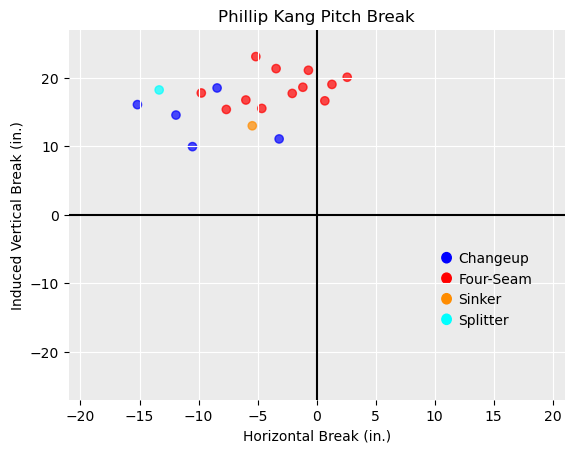

In [6]:
pitch_break_graph('Kang, Phillip')

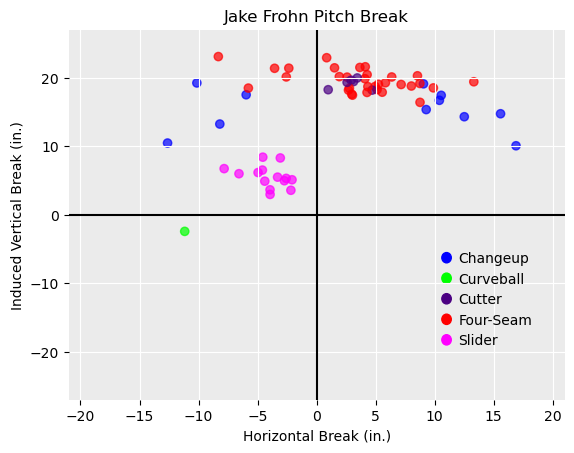

In [7]:
pitch_break_graph('Frohn, Jake')

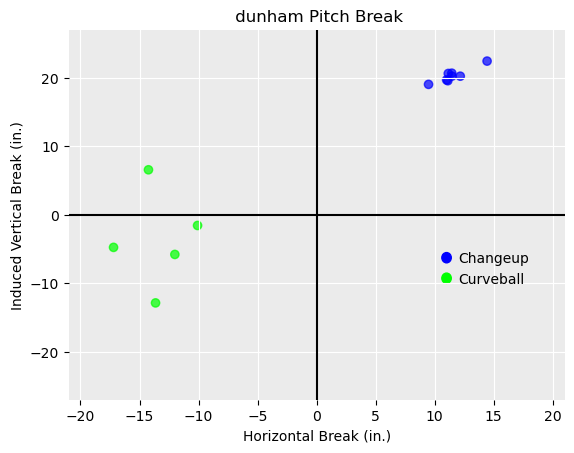

In [8]:
pitch_break_graph('dunham, ')

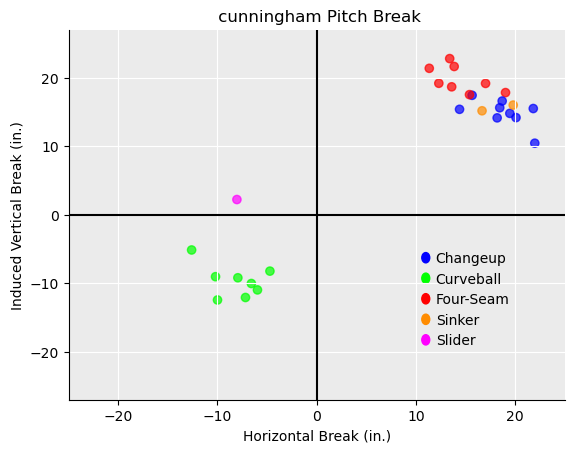

In [87]:
pitch_break_graph('cunningham, ')

### Pitch Chart

#### Pitch Chart Data

In [88]:
pitch_chart_dataset = dataset[['Pitcher', 'AutoPitchType', 'RelSpeed', 'PitchCall', 'InducedVertBreak', 'HorzBreak', 'RelHeight', 'RelSide', 'SpinRate', 'Extension']]

# NOTE: we can use PitchCall for whiff percentage... StrikeSwinging / (InPlay + StrikeSwinging + FoulBall)
# TODO: is there an Approach Angle thing?

display(pitch_chart_dataset)


,Pitcher,AutoPitchType,RelSpeed,PitchCall,InducedVertBreak,HorzBreak,RelHeight,RelSide,SpinRate,Extension
0,"Frohn, Jake",Changeup,85.27379,StrikeCalled,19.15040,9.04729,5.93642,1.39480,1983.131447,5.94131
1,"Frohn, Jake",Slider,78.43299,BallCalled,4.99481,-2.73059,5.90074,1.42815,2244.297752,5.28067
2,"Frohn, Jake",Slider,77.69056,StrikeSwinging,5.52134,-3.30953,5.94128,1.49953,2228.988845,5.24828
3,"Frohn, Jake",Four-Seam,85.42522,BallCalled,19.45344,13.30764,6.01319,1.42626,2219.211975,5.56380
4,"Frohn, Jake",Four-Seam,85.62863,FoulBall,20.32761,8.53642,5.93945,1.41119,2077.892061,5.72446
...,...,...,...,...,...,...,...,...,...,...
257,"Player 10, Extra",Changeup,82.15864,StrikeCalled,10.77768,18.76871,4.58499,2.73205,2207.765708,6.05224
258,"Player 10, Extra",Changeup,83.22200,InPlay,7.05457,20.24694,4.70356,2.87093,2254.924219,5.74614
259,"Player 10, Extra",Changeup,82.68706,StrikeCalled,14.60249,20.64292,4.98488,2.58888,2232.755094,5.89526
260,"Player 10, Extra",Changeup,82.54232,StrikeCalled,12.31056,20.41505,4.92257,2.58840,2221.698631,5.80548


#### Create Chart Function

In [89]:
def pitch_chart(name):
    selected_data = pitch_chart_dataset[pitch_chart_dataset['Pitcher'] == name]
    unique_pitches = np.unique(selected_data['AutoPitchType'])

    columns = unique_pitches
    
    # Setting variables for each row.
    max_velos = []
    avg_velos = []
    strikes_db_pitches = []
    strike_percentage = []
    whiff_percentage = []
    horizontal_break = []
    vertical_break = []
    release_height = []
    release_side = []
    spin_rate = []
    extension = []

    for pitch_type in unique_pitches:
        selected_pitch_data = selected_data[selected_data['AutoPitchType'] == pitch_type]

        velos = list(selected_pitch_data['RelSpeed'])

        max_velos.append(f'{max(velos):.1f}')
        avg_velos.append(f'{sum(velos)/len(velos):.1f}')

        pitch_calls = selected_pitch_data['PitchCall']
        strikes, total_pitches = (0, 0)

        for call in pitch_calls:
            if call != 'BallCalled' and call != 'InPlay':
                strikes += 1
            total_pitches += 1

        strikes_db_pitches.append(f'{strikes}/{total_pitches}')
        strike_percentage.append(f'{strikes/total_pitches * 100:.1f}%')
        
        swing_and_miss, total_swings = (0, 0)

        for call in pitch_calls:
            if call == 'StrikeSwinging':
                swing_and_miss += 1
                total_swings += 1
            elif call == 'InPlay' or call == 'FoulBall':
                total_swings += 1

        try:
            whiff_percentage.append(f'{swing_and_miss/total_swings*100:.1f}%')
        except ZeroDivisionError:
            whiff_percentage.append(f'--')

        horiz_breaks = list(selected_pitch_data['HorzBreak'])
        horizontal_break.append(f'{sum(horiz_breaks)/len(horiz_breaks):.1f}')

        vert_breaks = list(selected_pitch_data['InducedVertBreak'])
        vertical_break.append(f'{sum(vert_breaks)/len(vert_breaks):.1f}')

        release_heights = list(selected_pitch_data['RelHeight'])
        release_height.append(f'{sum(release_heights)/len(release_heights):.1f}')

        release_sides = list(selected_pitch_data['RelSide'])
        release_side.append(f'{sum(release_sides)/len(release_sides):.1f}')

        spin_rates = list(selected_pitch_data['SpinRate'])
        spin_rate.append(f'{sum(spin_rates)/len(spin_rates):.1f}')

        extensions = list(selected_pitch_data['Extension'])
        extension.append(f'{sum(extensions)/len(extensions):.1f}')

    chart = pd.DataFrame(
        data=[max_velos, avg_velos, strikes_db_pitches, strike_percentage, whiff_percentage, horizontal_break, vertical_break, release_height, release_side, spin_rate, extension], 
        columns=[unique_pitches], 
        index=['Maximum Velocity', 'Average Velocity', '# of Strikes/Pitches', 'Strike %', 'Whiff %', 'Vertical Movement', 'Horizontal Movement', 'Release Height', 'Release Side', 'Spin Rate (RPM)', 'Extension']
    )

    display(chart)


In [90]:
pitch_chart('Kang, Phillip')

,Changeup,Four-Seam,Sinker,Splitter
Maximum Velocity,83.2,83.7,82.8,82.6
Average Velocity,80.0,82.4,82.8,82.6
# of Strikes/Pitches,1/5,5/12,0/1,0/1
Strike %,20.0%,41.7%,0.0%,0.0%
Whiff %,100.0%,0.0%,--,--
Vertical Movement,-9.8,-3.0,-5.5,-13.3
Horizontal Movement,14.1,18.6,13.0,18.3
Release Height,5.5,5.5,5.5,5.5
Release Side,-0.6,-0.5,-0.5,-0.6
Spin Rate (RPM),1951.7,2131.9,2079.6,2152.4


In [91]:
pitch_chart('Frohn, Jake')

,Changeup,Curveball,Cutter,Four-Seam,Slider
Maximum Velocity,85.3,73.6,84.8,86.7,80.0
Average Velocity,81.1,73.6,83.9,84.1,77.2
# of Strikes/Pitches,5/11,0/1,3/6,20/32,6/14
Strike %,45.5%,0.0%,50.0%,62.5%,42.9%
Whiff %,50.0%,0.0%,0.0%,50.0%,33.3%
Vertical Movement,4.3,-11.2,3.0,3.7,-4.1
Horizontal Movement,15.3,-2.4,19.2,19.6,5.6
Release Height,5.7,5.9,5.9,5.9,5.9
Release Side,0.7,1.2,1.5,1.1,1.4
Spin Rate (RPM),1823.6,2439.0,2168.7,2127.0,2265.6


In [92]:
pitch_chart('dunham, ')

,Changeup,Curveball
Maximum Velocity,81.8,73.4
Average Velocity,80.0,71.8
# of Strikes/Pitches,5/11,2/5
Strike %,45.5%,40.0%
Whiff %,66.7%,50.0%
Vertical Movement,14.8,-13.4
Horizontal Movement,17.9,-3.7
Release Height,5.1,5.6
Release Side,2.8,2.7
Spin Rate (RPM),1939.9,2530.6


In [93]:
pitch_chart('cunningham, ')

,Changeup,Curveball,Four-Seam,Sinker,Slider
Maximum Velocity,86.6,75.2,87.7,87.2,74.8
Average Velocity,85.6,74.2,86.0,86.8,74.8
# of Strikes/Pitches,3/10,5/8,5/8,2/2,0/1
Strike %,30.0%,62.5%,62.5%,100.0%,0.0%
Whiff %,66.7%,66.7%,50.0%,0.0%,--
Vertical Movement,19.5,-8.1,14.5,18.2,-8.0
Horizontal Movement,14.7,-9.6,19.8,15.6,2.2
Release Height,5.9,5.9,6.0,6.0,5.8
Release Side,2.0,2.0,1.9,1.9,1.8
Spin Rate (RPM),2266.9,2281.5,2330.2,2273.3,2228.5
